In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
import json
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# for i, item in enumerate(list):

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | alofi
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | beringovskiy
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | moyale
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | le port
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | san quintin
Processing Record 18 of Set 1 | sao felix do xingu
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | dingle
Processing Record 21 of Set 1 | gulshat
City not found. Skipping...
Processing Record 22 of Set 1 | beir

Processing Record 35 of Set 4 | samaniego
Processing Record 36 of Set 4 | torbay
Processing Record 37 of Set 4 | ulaangom
Processing Record 38 of Set 4 | mitsamiouli
Processing Record 39 of Set 4 | hofn
Processing Record 40 of Set 4 | billings
Processing Record 41 of Set 4 | tasiilaq
Processing Record 42 of Set 4 | otorohanga
Processing Record 43 of Set 4 | saleaula
City not found. Skipping...
Processing Record 44 of Set 4 | hazaribag
Processing Record 45 of Set 4 | alice springs
Processing Record 46 of Set 4 | ust-kamchatsk
City not found. Skipping...
Processing Record 47 of Set 4 | pisco
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | sorland
Processing Record 50 of Set 4 | kavieng
Processing Record 1 of Set 5 | chuy
Processing Record 2 of Set 5 | saint-philippe
Processing Record 3 of Set 5 | butaritari
Processing Record 4 of Set 5 | shingu
Processing Record 5 of Set 5 | jizan
Processing Record 6 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 7 of 

Processing Record 23 of Set 8 | hurghada
Processing Record 24 of Set 8 | mareeba
Processing Record 25 of Set 8 | kiama
Processing Record 26 of Set 8 | pathein
Processing Record 27 of Set 8 | jacareacanga
Processing Record 28 of Set 8 | tiznit
Processing Record 29 of Set 8 | meyungs
City not found. Skipping...
Processing Record 30 of Set 8 | lawrence
Processing Record 31 of Set 8 | bairiki
Processing Record 32 of Set 8 | dicabisagan
Processing Record 33 of Set 8 | sug-aksy
City not found. Skipping...
Processing Record 34 of Set 8 | pundaguitan
Processing Record 35 of Set 8 | havoysund
Processing Record 36 of Set 8 | camacha
Processing Record 37 of Set 8 | ugoofaaru
Processing Record 38 of Set 8 | axixa do tocantins
City not found. Skipping...
Processing Record 39 of Set 8 | camargo
Processing Record 40 of Set 8 | kamaishi
Processing Record 41 of Set 8 | ekhabi
Processing Record 42 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 43 of Set 8 | kayerkan
Processing Rec

Processing Record 4 of Set 12 | half moon bay
Processing Record 5 of Set 12 | vao
Processing Record 6 of Set 12 | taltal
Processing Record 7 of Set 12 | taoudenni
Processing Record 8 of Set 12 | sao jose da coroa grande
Processing Record 9 of Set 12 | alotau
City not found. Skipping...
Processing Record 10 of Set 12 | hervey bay
Processing Record 11 of Set 12 | evanston
Processing Record 12 of Set 12 | eyl
Processing Record 13 of Set 12 | lichinga
Processing Record 14 of Set 12 | solnechnyy
Processing Record 15 of Set 12 | yerofey pavlovich
Processing Record 16 of Set 12 | ratnagiri
Processing Record 17 of Set 12 | itarema
Processing Record 18 of Set 12 | vysokogornyy
Processing Record 19 of Set 12 | hobyo
Processing Record 20 of Set 12 | kieta
Processing Record 21 of Set 12 | sarangani
Processing Record 22 of Set 12 | ossora
Processing Record 23 of Set 12 | hay river
Processing Record 24 of Set 12 | tabivere
Processing Record 25 of Set 12 | makamba
Processing Record 26 of Set 12 | gal

In [10]:
len(city_data)

549

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alofi,-19.0595,-169.9187,76.89,100,93,12.66,NU,2021-07-31 19:36:09
1,Bluff,-46.6000,168.3333,47.80,95,100,5.44,NZ,2021-07-31 19:36:09
2,Bredasdorp,-34.5322,20.0403,51.28,93,100,1.14,ZA,2021-07-31 19:36:10
3,Jamestown,42.0970,-79.2353,74.30,53,20,4.00,US,2021-07-31 19:35:43
4,Puerto Ayora,-0.7393,-90.3518,75.16,95,41,7.00,EC,2021-07-31 19:36:05
5,Rikitea,-23.1203,-134.9692,70.63,71,4,9.89,PF,2021-07-31 19:31:20
6,Beringovskiy,63.0500,179.3167,42.35,86,100,5.75,RU,2021-07-31 19:36:10
7,Moyale,3.5167,39.0584,69.85,58,99,12.10,KE,2021-07-31 19:36:11
8,Atuona,-9.8000,-139.0333,76.75,70,40,12.97,PF,2021-07-31 19:36:12
9,Ushuaia,-54.8000,-68.3000,44.26,57,75,24.16,AR,2021-07-31 19:33:17


In [14]:
# new_column_order = ["column2", "column4", "column1"]
new_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order] 
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alofi,NU,2021-07-31 19:36:09,-19.0595,-169.9187,76.89,100,93,12.66
1,Bluff,NZ,2021-07-31 19:36:09,-46.6000,168.3333,47.80,95,100,5.44
2,Bredasdorp,ZA,2021-07-31 19:36:10,-34.5322,20.0403,51.28,93,100,1.14
3,Jamestown,US,2021-07-31 19:35:43,42.0970,-79.2353,74.30,53,20,4.00
4,Puerto Ayora,EC,2021-07-31 19:36:05,-0.7393,-90.3518,75.16,95,41,7.00
5,Rikitea,PF,2021-07-31 19:31:20,-23.1203,-134.9692,70.63,71,4,9.89
6,Beringovskiy,RU,2021-07-31 19:36:10,63.0500,179.3167,42.35,86,100,5.75
7,Moyale,KE,2021-07-31 19:36:11,3.5167,39.0584,69.85,58,99,12.10
8,Atuona,PF,2021-07-31 19:36:12,-9.8000,-139.0333,76.75,70,40,12.97
9,Ushuaia,AR,2021-07-31 19:33:17,-54.8000,-68.3000,44.26,57,75,24.16


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")



In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

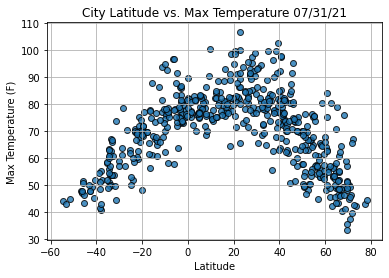

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

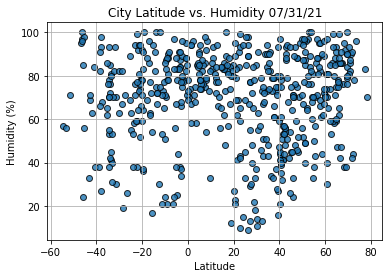

In [18]:

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

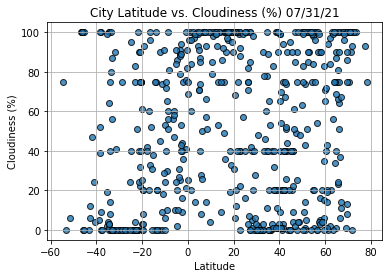

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

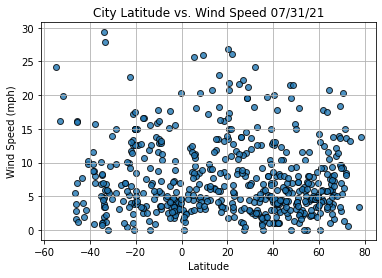

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                       Kodiak
Country                        US
Date          2021-07-31 19:36:13
Lat                         57.79
Lng                     -152.4072
Max Temp                    53.11
Humidity                       82
Cloudiness                     90
Wind Speed                   5.75
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
544     True
545     True
546     True
547     True
548     True
Name: Lat, Length: 549, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Jamestown,US,2021-07-31 19:35:43,42.0970,-79.2353,74.30,53,20,4.00
6,Beringovskiy,RU,2021-07-31 19:36:10,63.0500,179.3167,42.35,86,100,5.75
7,Moyale,KE,2021-07-31 19:36:11,3.5167,39.0584,69.85,58,99,12.10
11,Ribeira Grande,PT,2021-07-31 19:35:51,38.5167,-28.7000,77.40,73,20,10.36
12,Yellowknife,CA,2021-07-31 19:36:13,62.4560,-114.3525,80.29,53,20,9.22


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

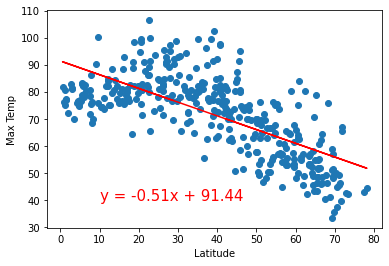

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

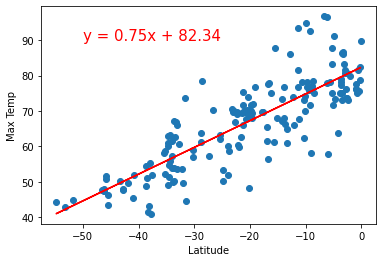

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

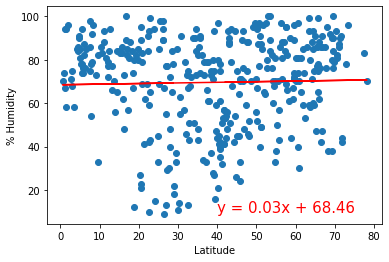

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

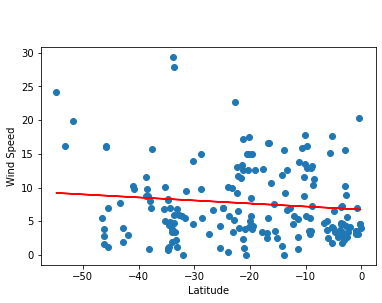

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))

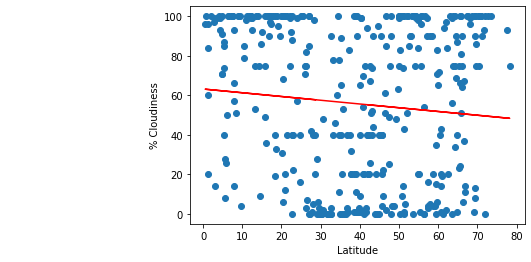

In [37]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,40))

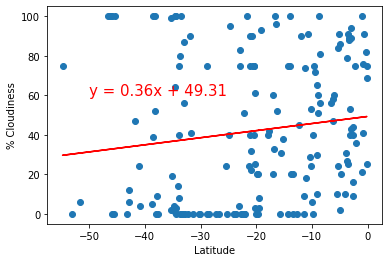

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

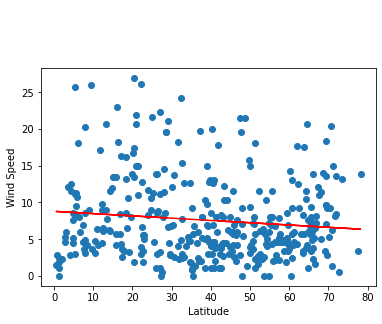

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

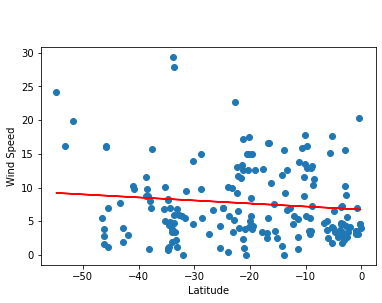

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))